In [57]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

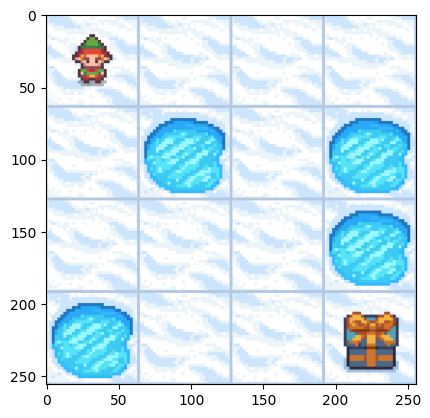

In [58]:
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="rgb_array")

grid_height, grid_width = env.unwrapped.desc.shape

env.reset()
plt.imshow(env.render())

In [59]:
print("observe")
print(env.observation_space)


print("action space")
print(env.action_space)

observe
Discrete(16)
action space
Discrete(4)


In [60]:
Q_table = np.zeros([env.observation_space.n, env.action_space.n])
Q_table.shape

(16, 4)

In [61]:
# helper vars

gamma = 0.9
# future reward value by agent = gamma * current rewards
# default is 0.9 usually
# the more vague the goal is the lower it should be
# never use exactly 1

max_epsilon = 1.0  # technically just "starting epsilon"
epsilon = max_epsilon
min_epsilon = 0.01
# how wild the agent is
# higher means the agent is more random (relies less on what it knows)

decay = 0.0005
# how quickly the epsilon should go down over time

learning_rate = 0.5
# higher is bolder updates
# ***usually*** larger world lower learning_rate (alpha) is good

total_episodes = 10_000
# total training rounds

max_steps = 50

In [62]:
# Q-learning formula
# Q(s, a) = Q(s, a) + alpha * (r + y * max(Q(s', a')) - Q(s, a))

def calculate_value(Q, state, action, reward, next_state, alpha, gamma):
    Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
    return Q

In [63]:
# helper for Q-values visualisation
def summarise_best(Q_table, grid_width, grid_height):
    best_values = np.max(Q_table, axis = 1)
    return best_values.reshape(grid_width, grid_height)

In [64]:
# Q-learning agent training loop

for episode in range(total_episodes):
    state, info = env.reset()

    done = False
    total_rewards = 0

    for step in range(max_steps):
        # 1: next action? (epsilon to decide whether we trust prev knowledge or take a guess)
        if np.random.uniform(0, 1) > epsilon:
            action = np.argmax(Q_table[state, :])
        else:
            action = env.action_space.sample()

        # 2: get the results for actions in phase 1 (observation, reward, done)
        observation, reward, done, truncated, info = env.step(action)

        # 3: update the Q_table
        Q_table = calculate_value(Q_table, state, action, reward, observation, learning_rate, gamma)

        # 4: save state, update
        state = observation
        total_rewards += reward

        # 5: check for victory condition
        if done:
            print(f"Step count: {step}")
            break

    # final phase: apply to decay to epsilon
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay * episode)
    print(f"Episode {episode} done with current reward: {total_rewards}\nEpsilon: {epsilon}")

Step count: 2
Episode 0 done with current reward: 0
Epsilon: 1.0
Step count: 1
Episode 1 done with current reward: 0
Epsilon: 0.9995051237293776
Step count: 12
Episode 2 done with current reward: 0
Epsilon: 0.9990104948350412
Step count: 1
Episode 3 done with current reward: 0
Epsilon: 0.9985161131933338
Step count: 16
Episode 4 done with current reward: 0
Epsilon: 0.9980219786806598
Step count: 2
Episode 5 done with current reward: 0
Epsilon: 0.9975280911734855
Step count: 3
Episode 6 done with current reward: 0
Epsilon: 0.9970344505483393
Step count: 12
Episode 7 done with current reward: 0
Epsilon: 0.9965410566818107
Step count: 5
Episode 8 done with current reward: 0
Epsilon: 0.9960479094505515
Step count: 6
Episode 9 done with current reward: 0
Epsilon: 0.9955550087312749
Step count: 9
Episode 10 done with current reward: 0
Epsilon: 0.9950623544007555
Step count: 10
Episode 11 done with current reward: 0
Epsilon: 0.9945699463358298
Step count: 1
Episode 12 done with current reward